In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 

In [20]:
reforestation = pd.read_csv('reforestationDB.csv')
reforestation.head()

,State,Abbreviation,County,Population,Temperature,Precipitation,Palmer-Z,Land-Prices
0,Alabama,AL,Autauga,59759,66.1,51.89,-0.26,NaN
1,Alabama,AL,Baldwin,246435,70.1,50.71,-0.84,NaN
2,Alabama,AL,Barbour,24706,66.4,48.95,-0.22,NaN
3,Alabama,AL,Bibb,22005,64.4,53.22,-0.29,NaN
4,Alabama,AL,Blount,59512,62.5,60.68,0.24,NaN


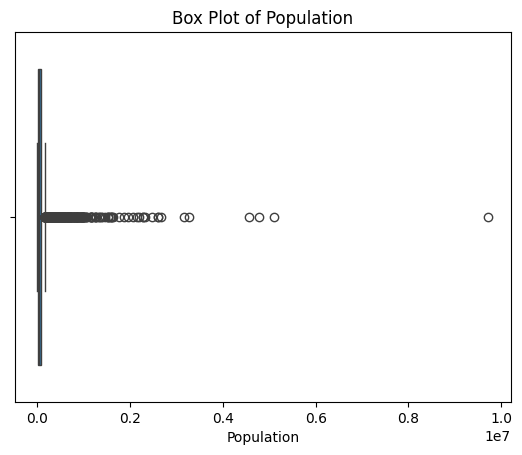

In [21]:
import seaborn as sns
sns.boxplot(x=reforestation['Population'])
plt.title('Box Plot of Population')
plt.show()

In [24]:
threshold = 0.15e7
num_bins = 10

bin_edges = list(np.linspace(reforestation['Population'].min(), threshold, num_bins - 1)) + [reforestation['Population'].max()]

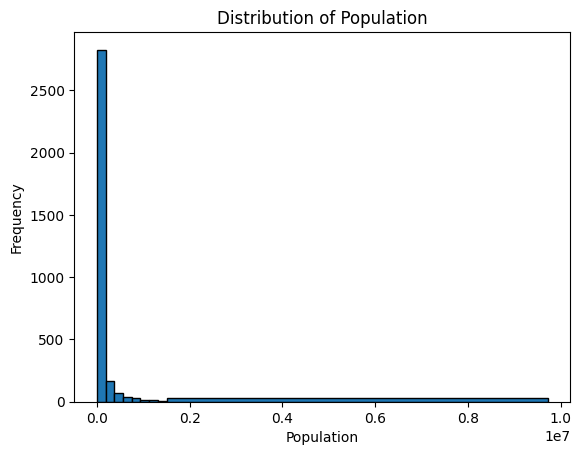

In [26]:
plt.hist(reforestation['Population'], bins=bin_edges, edgecolor='k')
plt.xlabel('Population')
plt.ylabel('Frequency')
plt.title('Distribution of Population')
plt.show()

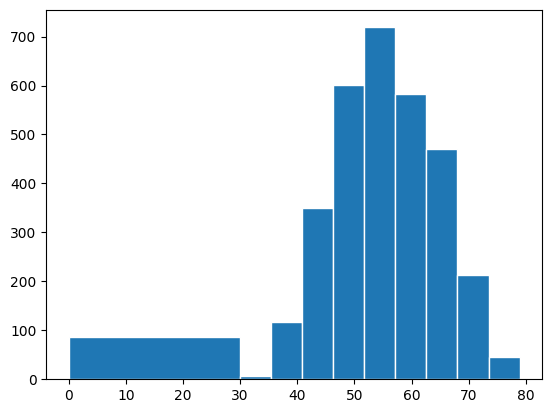

In [35]:
#plt.hist(reforestation['Temperature'], bins=10, edgecolor='white')
max_temp = reforestation['Temperature'].max()
bins = [0, 30] + list(np.linspace(30, max_temp, 10)) 

plt.hist(reforestation['Temperature'], bins=bins, edgecolor='white')
plt.show()

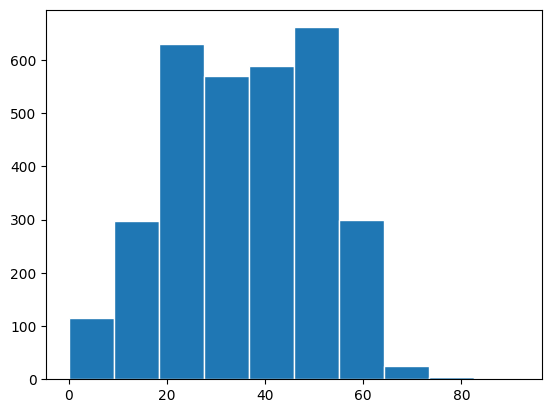

In [38]:
# plt.hist(reforestation['Precipitation'], bins=10, edgecolor='white')
min_val = reforestation['Precipitation'].min()
max_val = reforestation['Precipitation'].max()
bins = np.linspace(min_val, max_val, 11) 

plt.hist(reforestation['Precipitation'], bins=bins, edgecolor='white')
plt.show()